<a href="https://colab.research.google.com/github/RavelPaniagua/IA-con-Python/blob/main/Arbol_de_Decisi%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Regresion Logistica se utiliza cuando queremos hacer una clasificacion de nuestros datos

In [2]:
import pandas as pd
datos = pd.read_csv("train.csv")
datos.head() # nos muestra las primeras 5 lineas de los datos

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# vamos a ver un poco mas de informacion
datos.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: xlabel='Survived', ylabel='count'>

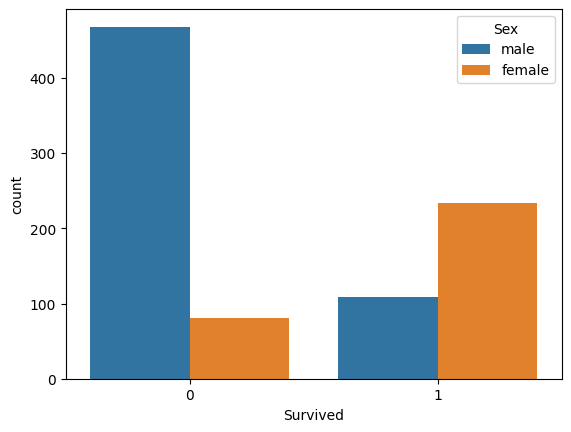

In [4]:
import seaborn as sb
sb.countplot(x="Survived",data=datos,hue="Sex") # con hue le cambiamos el color segun el el sexo de los que sobrevivieron

In [5]:
datos.isna().sum() # isna es para que nos muestre los datos que estan vacios y sum para que nos contabilice por columnas

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


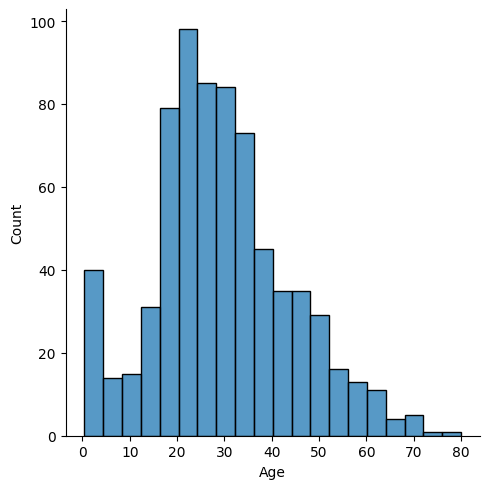

In [6]:
# como vemos en el resultado anterior visualizamos que existen 177 personas que no tienen la edad registrada y como es un dato importante lo vamos a rellenar con un valor promedio
# primero vamos a visualizar en una grafica como se comportan las edades que si estan registradas para poder saber mas o menos cuales son las edades que vamos a colocar como promedios
sb.displot(x="Age",data=datos)

In [7]:
#vamos a rellenar esos 177 que no tienen edad con una edad promedio utilizando el metodo mean()
# para llenarlo utilizamos fillna() y le pasamos el promedio
datos["Age"]
datos["Age"].mean()
datos["Age"].fillna(datos["Age"].mean())

,Age
0,22.000000
1,38.000000
2,26.000000
3,35.000000
4,35.000000
...,...
886,27.000000
887,19.000000
888,29.699118
889,26.000000


In [8]:
datos["Age"] = datos["Age"].fillna(datos["Age"].mean())

In [9]:
datos.isna().sum()
#con esto ya vemos que la columna de la edad fue llenada con valores promedios

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [10]:
#como la columna Cabin no es tan relevante y encima de eso no son datos numericos pues vamos a removerlo
datos = datos.drop(["Cabin"],axis=1) # recordamos que para eliminar una columna lo hacemos de esta manera

In [11]:
#para la columna Embarqued vamos a contar a ver cuantos valores contiene de cada uno con value_counts
datos["Embarked"].value_counts()

,count
Embarked,
S,644
C,168
Q,77


In [12]:
#como ya solamente nos quedan 2 celdas que se encuentran sin datos en la columna Embarked
# pues podemos simplemente eliminar esos dos datos
datos = datos.dropna() # esto es para eliminar los registros que no tiene valor

In [13]:
# vamos a ver que ahora todos queden en 0
datos.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [14]:
#vamoa a ver como se ve nuestro set de datos
datos.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [15]:
#ahora vamos a quitar algunos datos que no nos sirven para lo que queremos en nuestros resultados como por ejemplo el PassengerId, name y ticket
datos = datos.drop(["PassengerId","Name","Ticket"],axis=1)

In [16]:
datos.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [17]:
#ahora vamos a convertir la columna de Sex en datos de 0 y 1 con los dummies
pd.get_dummies(datos["Sex"],dtype=int)
# como podemos ver en este caso no es necesario que tengamos las dos columnas simplemente podemos dejar una columna para esto podemos agregar un parametro mas a nuestro dumies
pd.get_dummies(datos["Sex"],dtype=int,drop_first=True) # para que borre la primera columna

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [18]:
dumies_sex = pd.get_dummies(datos["Sex"],dtype=int,drop_first=True)
#unimos nuestra nueva columna a nuestro set principal


In [19]:
#y borramos la columna que actual Sex de nuestro set
datos = datos.drop(["Sex"],axis=1)


In [20]:
datos.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked
0,0,3,22.0,1,0,7.2500,S
1,1,1,38.0,1,0,71.2833,C
2,1,3,26.0,0,0,7.9250,S
3,1,1,35.0,1,0,53.1000,S
4,0,3,35.0,0,0,8.0500,S


In [21]:
#vamos a trabajar la columna Embarked porque como vemos esta tiene 3 valores diferentes C S Q
#vamos a crear una dumies
dumies_embarked = pd.get_dummies(datos["Embarked"],dtype=int,drop_first=True) #le decimos que nos elimine una columna del dumies porque no será necesaria
#luego unimos nuestra dumies a nuestro set de datos y luego eliminamos la columna Embarked
datos = datos.join(dumies_embarked)
# y eliminamos la columna del data set
datos = datos.drop(["Embarked"],axis=1)

<Axes: >

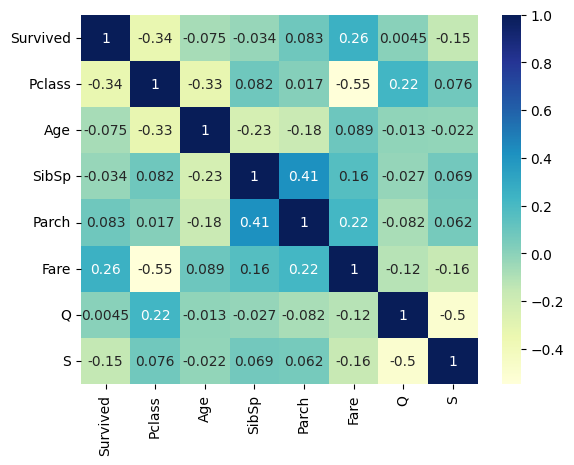

In [22]:
sb.heatmap(datos.corr(),annot=True, cmap="YlGnBu")

<Axes: xlabel='Survived', ylabel='count'>

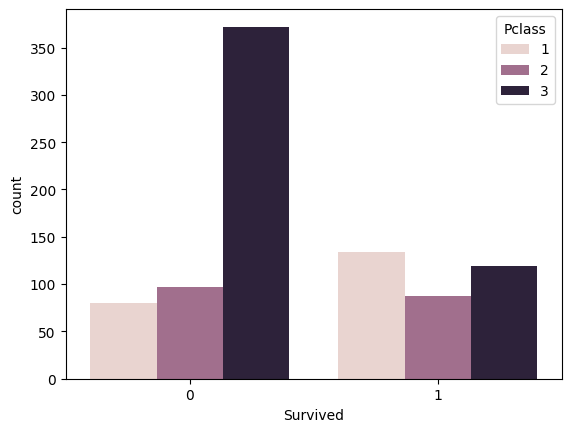

In [23]:
sb.countplot(x="Survived", data=datos, hue="Pclass")

In [24]:
#aqui podemos ver una relacion entre la clase en la que viajaban los pasajeron 1 2 y 3 clase teniendo mas probabilidad de sobrevivir los que estaban en 1ra clase

In [25]:
#Teniendo ya nuestro analisis y nuestro set de datos limpio vamos a proceder a entrenar nuestro modelo

In [26]:
X = datos.drop(["Survived"],axis=1)# eliminamos nuestra etiqueta del data set porque estas son las caranteristicas o las extradas
y = datos["Survived"] # y esta es nuestra etiqueta

from sklearn.model_selection import train_test_split

#separamos nuestros valores de entrenamientos de las pruebas para al final comparar que tan bien le fue a nuestro modelo luego de haberlo entrenado
X_ent, X_pru, y_ent, y_pru = train_test_split(X,y,test_size=.2)

In [27]:
from sklearn.tree import DecisionTreeClassifier
modelo = DecisionTreeClassifier(max_depth=50)
modelo.fit(X_ent,y_ent)
predicciones = modelo.predict(X_pru)

In [28]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pru,predicciones)

0.6685393258426966

In [31]:
from sklearn.tree import DecisionTreeClassifier

#vamos a entrenar varios modelos para ver cual es su exactitud entre cada uno de ellos
resultado = []
for i in range(1,15):
  modelo = DecisionTreeClassifier(max_depth=i)
  modelo.fit(X_ent,y_ent)
  predicciones = modelo.predict(X_pru)
  exactitud = accuracy_score(y_pru,predicciones)
  print(f"Resultado para {i} : {exactitud}")
  resultado.append(exactitud)

Resultado para 1 : 0.6573033707865169
Resultado para 2 : 0.6853932584269663
Resultado para 3 : 0.7191011235955056
Resultado para 4 : 0.7134831460674157
Resultado para 5 : 0.7134831460674157
Resultado para 6 : 0.702247191011236
Resultado para 7 : 0.6910112359550562
Resultado para 8 : 0.7078651685393258
Resultado para 9 : 0.7078651685393258
Resultado para 10 : 0.6966292134831461
Resultado para 11 : 0.6797752808988764
Resultado para 12 : 0.7359550561797753
Resultado para 13 : 0.7191011235955056
Resultado para 14 : 0.702247191011236


<Axes: >

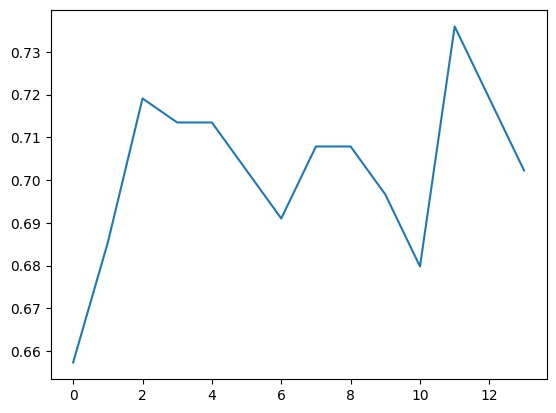

In [32]:
sb.lineplot(data=resultado)

In [33]:
modelo = DecisionTreeClassifier(max_depth = 12)
modelo.fit(X_ent,y_ent)
predicciones = modelo.predict(X_pru)
exactitud = accuracy_score(y_pru,predicciones)
print(f"Resultado para {12} : {exactitud}")


Resultado para 12 : 0.7247191011235955


In [34]:
from sklearn.metrics import classification_report
#con el clasification report nos da un poco mas de informacion
print(classification_report(y_pru,predicciones))

              precision    recall  f1-score   support

           0       0.75      0.86      0.80       116
           1       0.64      0.47      0.54        62

    accuracy                           0.72       178
   macro avg       0.70      0.66      0.67       178
weighted avg       0.71      0.72      0.71       178



In [35]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pru,predicciones) # esto nos muestra una matriz de confunciones

#y para verlo mejor vamos a crear un DataFrame con pandas
pd.DataFrame(confusion_matrix(y_pru,predicciones),columns=["Pred: No","Pred: Si"],index=["Real: No","Real: Si"])

,Pred: No,Pred: Si
Real: No,100,16
Real: Si,33,29


[Text(0.4416339686098655, 0.9615384615384616, 'Pclass <= 2.5\n0.476\n711\n[433, 278]\nMurio'),
 Text(0.2289798206278027, 0.8846153846153846, 'Fare <= 13.646\n0.492\n331\n[144, 187]\nVivió'),
 Text(0.3353068946188341, 0.9230769230769231, 'True  '),
 Text(0.1031390134529148, 0.8076923076923077, 'Fare <= 7.75\n0.439\n83\n[56.0, 27.0]\nMurio'),
 Text(0.09417040358744394, 0.7307692307692307, '0.0\n11\n[11, 0]\nMurio'),
 Text(0.11210762331838565, 0.7307692307692307, 'Age <= 50.5\n0.469\n72\n[45, 27]\nMurio'),
 Text(0.08968609865470852, 0.6538461538461539, 'Age <= 39.5\n0.48\n65\n[39, 26]\nMurio'),
 Text(0.07174887892376682, 0.5769230769230769, 'Q <= 0.5\n0.462\n58\n[37, 21]\nMurio'),
 Text(0.06278026905829596, 0.5, 'Parch <= 1.5\n0.448\n56\n[37, 19]\nMurio'),
 Text(0.053811659192825115, 0.4230769230769231, 'Age <= 17.5\n0.44\n55\n[37, 18]\nMurio'),
 Text(0.017937219730941704, 0.34615384615384615, 'Age <= 16.5\n0.444\n3\n[1, 2]\nVivió'),
 Text(0.008968609865470852, 0.2692307692307692, '0.0\n1

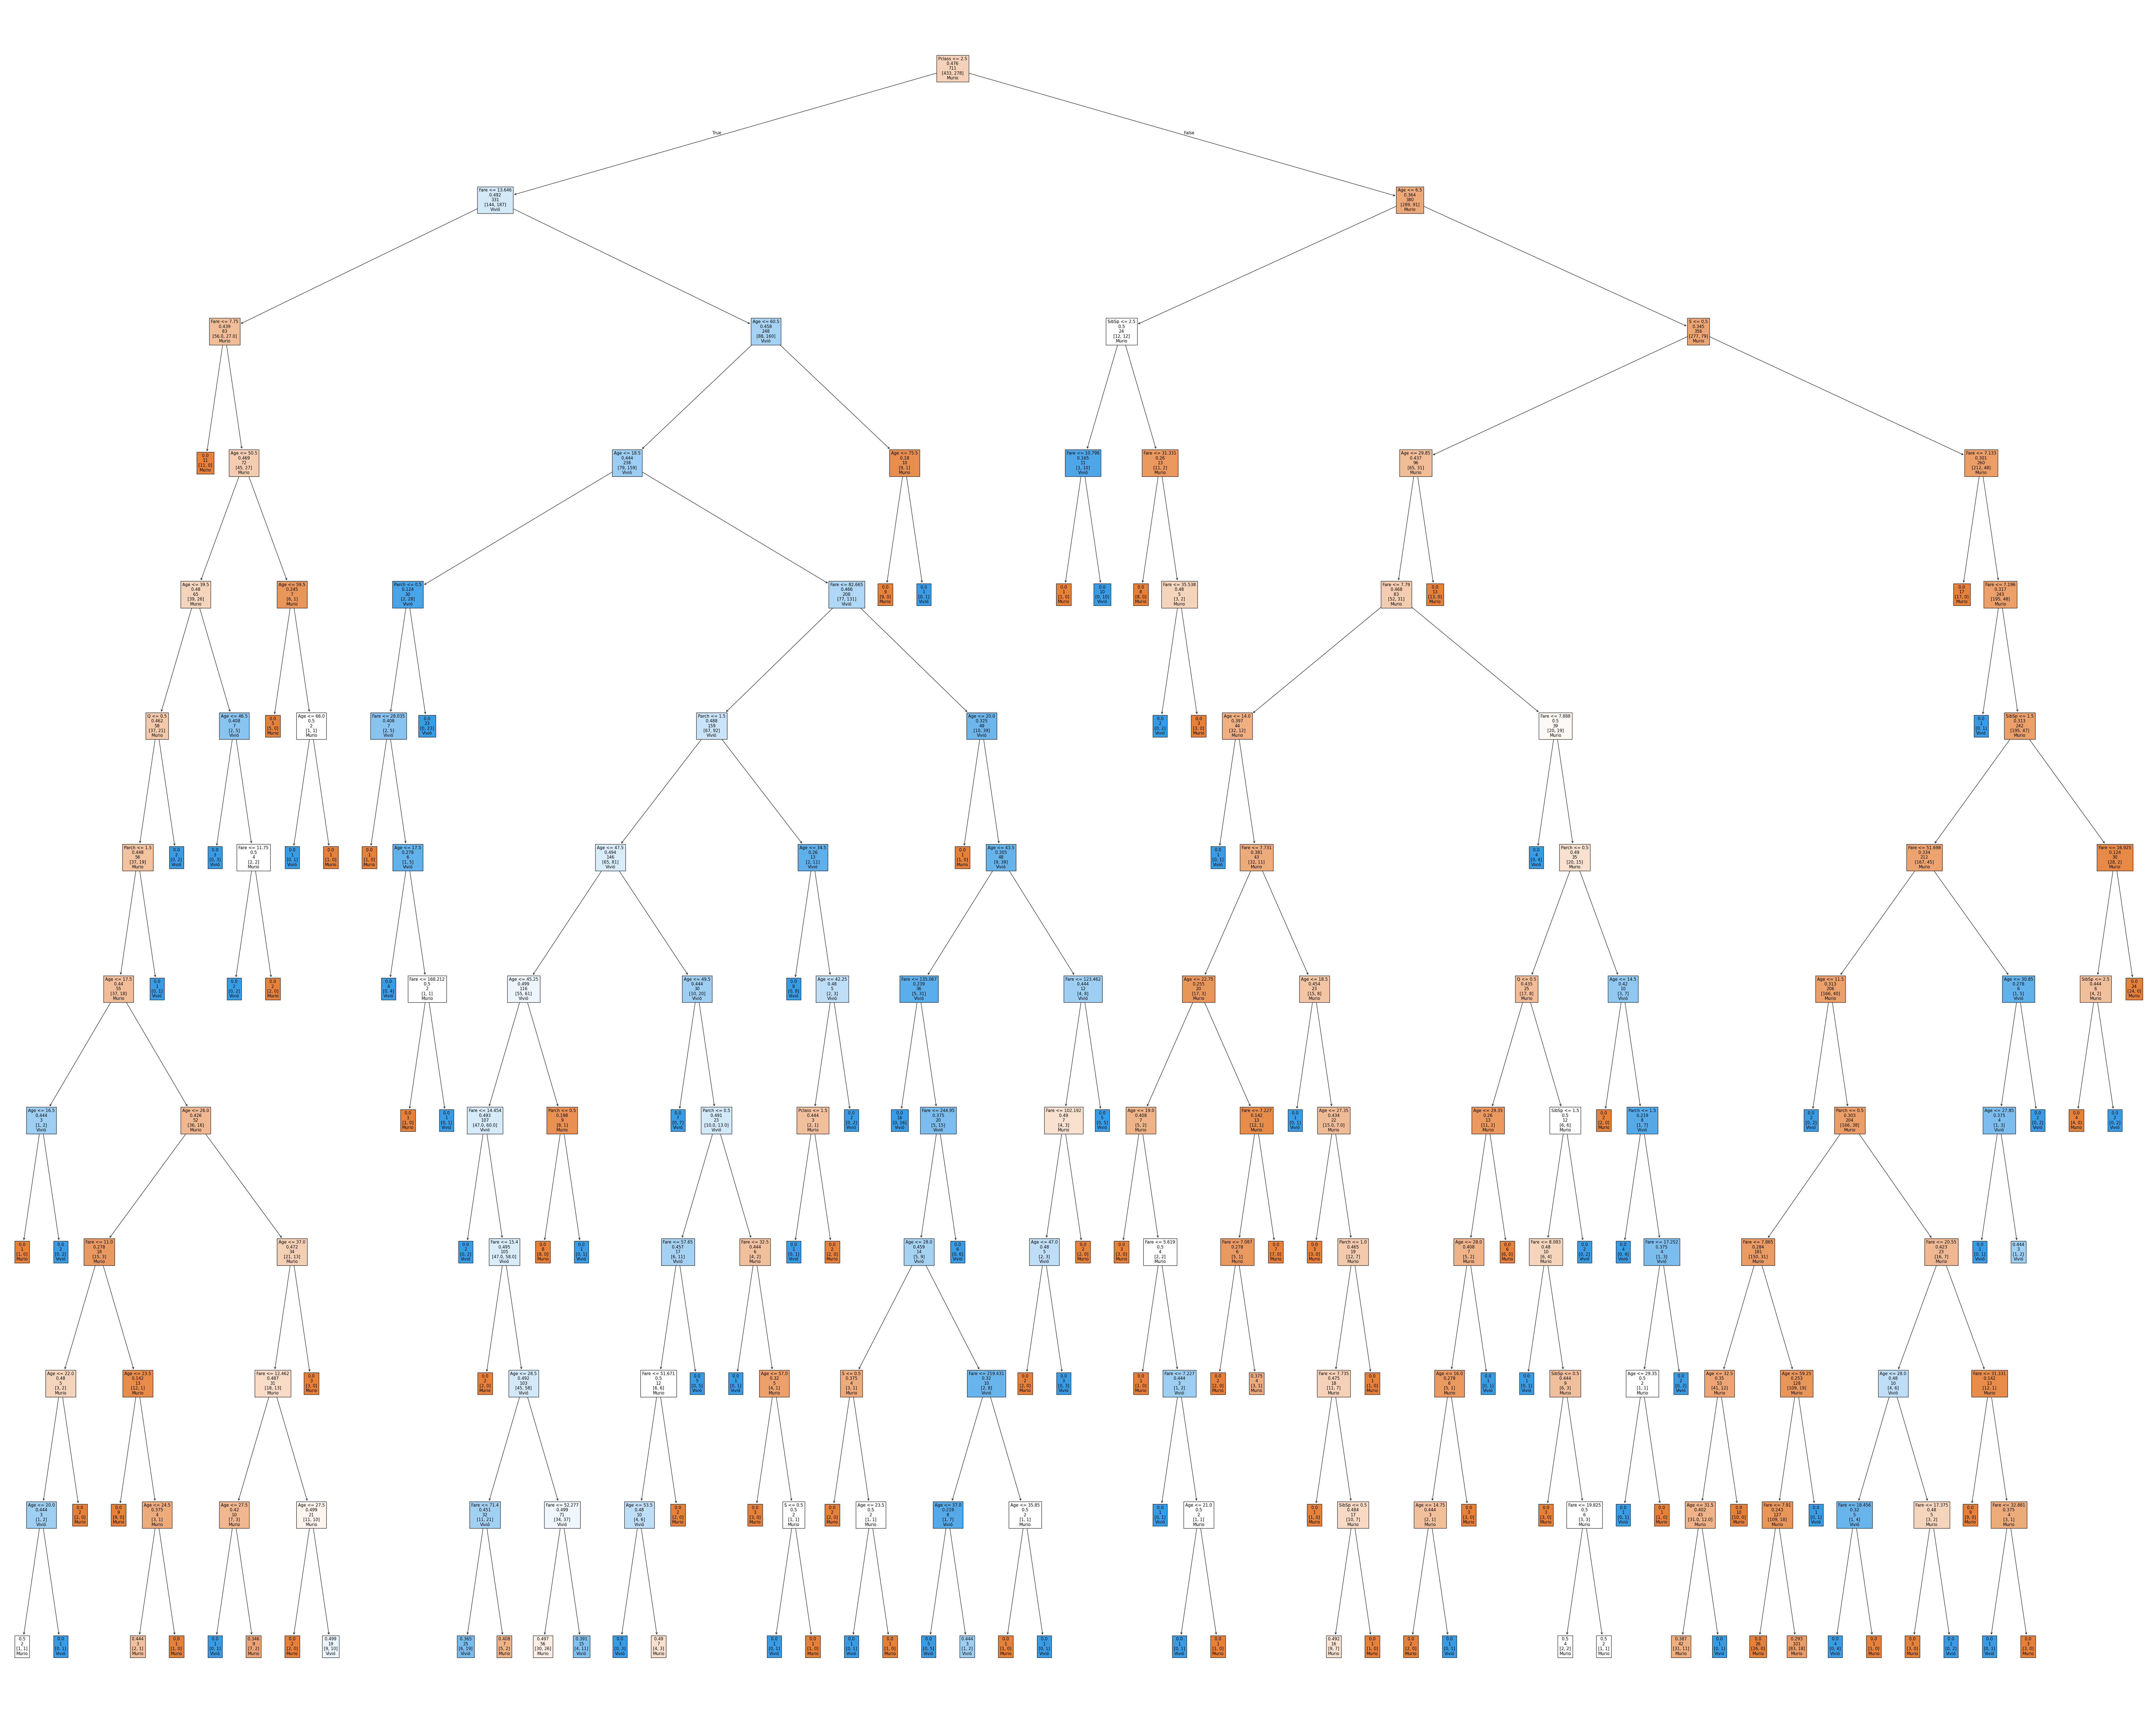

In [37]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(100,80))
plot_tree(
    modelo,
    feature_names=X_ent.columns,
    class_names=["Murio","Vivió"],
    filled=True,
    label="none"
)


In [ ]:
from sklearn.linear_model import LogisticRegression
#si nos muestra un error en elimite de iteraciones STOP: TOTAL NO. of ITERATIONS REACHED LIMIT
#podemos especificar el max_iter
modelo = LogisticRegression(max_iter=1000)

modelo.fit(X_ent,y_ent) # entrenamos nuestro modelo

LogisticRegression(max_iter=1000)

In [ ]:
#vamos a hacer las prediciones con nuestro set de pruebas
predicciones = modelo.predict(X_pru)


In [ ]:
# Esta vez vamos a utilizar un paquete de sklearn accuracy_score para que nos diga la exactitu de como le fue a nuestro modelo en el entrenamiento
from sklearn.metrics import accuracy_score
accuracy_score(y_pru,predicciones)

0.8258426966292135

In [ ]:
from sklearn.metrics import classification_report
#con el clasification report nos da un poco mas de informacion
print(classification_report(y_pru,predicciones))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87       115
           1       0.79      0.70      0.74        63

    accuracy                           0.83       178
   macro avg       0.81      0.80      0.80       178
weighted avg       0.82      0.83      0.82       178



In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pru,predicciones) # esto nos muestra una matriz de confunciones

#y para verlo mejor vamos a crear un DataFrame con pandas
pd.DataFrame(confusion_matrix(y_pru,predicciones),columns=["Pred: No","Pred: Si"],index=["Real: No","Real: Si"])

,Pred: No,Pred: Si
Real: No,103,12
Real: Si,19,44


In [ ]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1


In [ ]:
#vamos a hacer una prueba, vamos a definir a una nueva persona a la cual el modelo nuca ha conocido para ver su resultado
nueva_persona = [3,30,0,0,10,1,0,0]

prediccion = modelo.predict([nueva_persona])

if prediccion[0] == 1:
  print("Sobreviviste")
else:
  print("No sobreviviste")

No sobreviviste


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
